# Chronicling America API in Mathematica

by Vishank Patel

**LOC Chronicling America API Documentation:** https://chroniclingamerica.loc.gov/about/api/

These recipe examples were tested on March 1, 2022.

**Attribution:** *We thank **Professor Jessica Kincaid** (UA Libraries, Hoole Special Collections) for the use-cases. All data was collected from the Library of Congress, Chronicling America: Historic American Newspapers site, using the API.*

Note that the data from the *Alabama state intelligencer*, *The age-herald*, and the *Birmingham age-herald* were contributed to Chronicling America by The University of Alabama Libraries: https://chroniclingamerica.loc.gov/awardees/au/

## 1. Basic API request

The Chronicling America  API  identifies   newspapers   and  other  records  using  LCCNs. We  can  query  the  API  once  we  have  the  LCCN  for  the  newspaper   and  even  ask  for  particular   issues  and  editions. For example, the following link  lists  newspapers   published   in  the  state  of  Alabama, from  which  the  LCCN  can  be  obtained:   https://chroniclingamerica.loc.gov/newspapers/?state=Alabama 

Here is an example with the *Alabama State Intelligencer*:

In [ ]:
ANewspaper=Association[URLExecute["https://chroniclingamerica.loc.gov/lccn/sn84023600.json"]]

<|place_of_publication -> Tuskaloosa [sic], Ala., lccn -> sn84023600, 
 
>   start_year -> 183?, place -> {Alabama--Tuscaloosa--Tuscaloosa}, 
 
>   name -> Alabama State intelligencer. [volume], publisher -> T.M. Bradford, 
 
>   url -> https://chroniclingamerica.loc.gov/lccn/sn84023600.json, end_year -> 18??, 
 
>   issues -> {}, subject -> {}|>

Turning  URL  Execute's   json output  into  an  association   allows  data  to  be  queried  using  key  names  as  demonstrated   below:  

In [ ]:
ANewspaper["name"]

Alabama State intelligencer. [volume]

In [ ]:
ANewspaper["publisher"]

T.M. Bradford

Moving  on  to  another  publication,   we  can  get  the  182nd  page  (seq-182)   of  the  Evening  Star  newspaper   published   on  November   19,  1961.

<|jp2 -> https://chroniclingamerica.loc.gov/lccn/sn83045462/1961-11-19/ed-1/seq-182.jp2, 
 
>   sequence -> 182, text -> 
 
>    https://chroniclingamerica.loc.gov/lccn/sn83045462/1961-11-19/ed-1/seq-182/ocr.txt, 
 
>   title -> {url -> https://chroniclingamerica.loc.gov/lccn/sn83045462.json, 
 
>     name -> Evening star. [volume]}, 
 
>   pdf -> https://chroniclingamerica.loc.gov/lccn/sn83045462/1961-11-19/ed-1/seq-182.p\
 
>     df, ocr -> https://chroniclingamerica.loc.gov/lccn/sn83045462/1961-11-19/ed-1/seq-\
 
>     182/ocr.xml, issue -> 
 
>    {url -> https://chroniclingamerica.loc.gov/lccn/sn83045462/1961-11-19/ed-1.json, 
 
>     date_issued -> 1961-11-19}|>
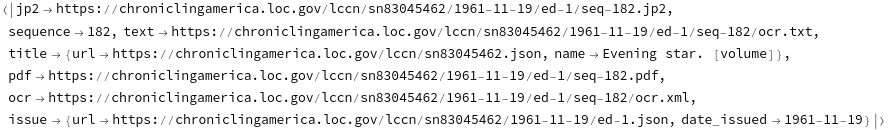

In [ ]:
EveningStar= Association[URLExecute["https://chroniclingamerica.loc.gov/lccn/sn83045462/1961-11-19/ed-1/seq-182.json"]]

{-Image-}
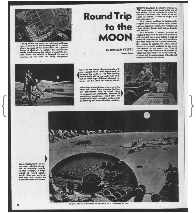

In [ ]:
URLExecute[EveningStar["pdf"]]

## 2. Frequency of "University of Alabama" mentions

The  URL below limits to searching newspapers in the state of Alabama and  provides   500  results  of   "University   of  Alabama"   mentions.   Note  that  phrases  can  be  searched   by  putting  them  inside  parentheses   for  the  proxtext query.

In [ ]:
rawAlabamaInfo= URLExecute["https://chroniclingamerica.loc.gov/search/pages/results/?state=Alabama&proxtext=(University%20of%20Alabama)&rows=100&format=json"];
alabamaInfo = Association[rawAlabamaInfo[[5]]];

In [ ]:
alabamaInfo["items"]//Dimensions

{100, 28}

In [ ]:
alabamaNewspapers = Association @@@ alabamaInfo["items"];
alabamaNewspapers // Dataset

*Dataset Output not shown here*

In [ ]:
alabamaNewspapers[[All, "date"]] // Shallow

{19180818, 19160806, 19130618, 19140602, 19120714, 19170513, 19000301, 19110319, 
 
>   19210522, 19120808, <<90>>}

In [ ]:
datesList= DateObject /@ ToString /@ alabamaNewspapers[[All, "date"]];

-Graphics-
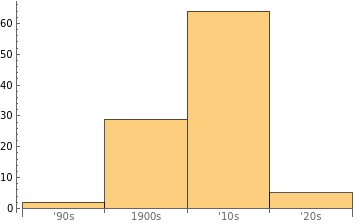

In [ ]:
DateHistogram[datesList , "Decade"]

## 3. Sunday Comic Titles in the Age-herald

The  Age  - Herald  published   comics  every  Sunday,  we  will  try  to  extract  the  titles  of  those  published   on  page  15  of  the  17th  October  1897  edition.

In [ ]:
ocrText= URLExecute["https://chroniclingamerica.loc.gov/lccn/sn86072192/1897-10-31/ed-1/seq-14/ocr.txt"];

In [ ]:
StringTake[ocrText,1000] // InputForm

"SONGS AND THEIR SINGERS.\nV- ârm QBmAigb* ,-â¢ ... *â¢** -j.\nih\nâ 'Tis hard to\
 
>    \
give the hand where the heart can never be!â\nâPunch.\nA SIMILE FAR FETCHED.\
 
>    A \
CHANGE OF HEART.\nPriscilla is my Klondike girl, HeâI think I shall have to\
 
>    preach\nAt \
least I call her so. a bicycle sermon tomorrow advis\nThere's gold in\
 
>    every straggling \
ing all my parishioners to ride a\nâ¢i- curl, wheel.\nAlluring\
 
>    in its glow. SheâWhy, \
Joseph, it was only\nThe appellation's naught to do,\
 
>    three weeks ago that you \
denounc\nHowe'er, with aught of gold; ed the wheel most\
 
>    thoroughly.\nâTis based on \
this: whene'er I woo HeâYes; but remember, my\
 
>    dear.\nSheâs distant and so cold. that \
was while I was learning to\nâTown\
 
>    Topics. ride.âHarper's Bazar.\nTHE PUG DOG \
PAPAâS LAMENT.\n\"My stars, nurse,\
 
>    I wouldnât have minded if thereâd been three, \
or even\nfour, but this is too\
 
>    much!â\nâNew York Journal.\nTRUE UP TO A CERTAIN \
POINT. SURE TEST.\nH'When\
 
>    woman won't, she wonât,\" âI often wonder just what sh"

-------------------
We  will  split  the  string  with  delimiters   of  space,  period  and  \n.  Then,  select  the  uppercase   words  as  they seem to generally  correspond   to  the  comic  titles.

In [ ]:
rawTitleList1 = Select[StringSplit[ocrText,{" ", ".", "\n"}], UpperCaseQ]

{SONGS, AND, THEIR, SINGERS, , , , , , , , A, SIMILE, FAR, FETCHED, , A, CHANGE, OF, 
 
>   HEART, , I, I, , , , , I, , , I, , , THE, PUG, DOG, LAMENT, , I, , TRUE, UP, TO, A, 
 
>   CERTAIN, POINT, , SURE, TEST, , , , , , , , , , , , , , , , , SCORCHING, AFTER, NEW, 
 
>   BICYCLE, VOTE, , A, HORSE, SHOW, SUGGESTION, , I, , , VAN, WYCK, ON, ONE, WHEEL, , 
 
>   GEORGE, IN, A, BROWN, STUDY, , , THE, MOTTO, , SHREWDNESS, NEEDED, , , , , HER, 
 
>   REPUTATIONS, , , THE, FINAL, CALL, , , I, I, , THE, REPLY, OF, SPAIN, , V, LOW, 
 
>   RIDES, ERECT, , GEN, , CLEVER, DODGE, , , WHY, HE, LIKED, IT, , , , I, , I, , I, , 
 
>   PAPA, KNOWS, , , AN, EXCUSE, , , J, NOT, FOR, HIM, , A, , I, I, I, I, , , IN, THE, 
 
>   FIRELIGHT, , I, , , , , , H, , L, WHERE, NIGHTS, LAST, SIX, MONTHS, , , , , T, 
 
>   SOUNDED, QUEER, , , , , , MUCH, THE, SAME, THING, , , A, KLONDIKER, , , I, I, , , , 
 
>   THE, MAN, WHO, IS, WEARING, A, DIAMOND, RING, FOR, THE, FIRST, TIME, , V, , }

In [ ]:
rawTitleList2 = DeleteCases[rawTitleList1 , "I"]

In [ ]:
titlesString = StringRiffle[rawTitleList2]

SONGS AND THEIR SINGERS        A SIMILE FAR FETCHED  A CHANGE OF HEART          THE PUG\
 
>   DOG LAMENT   TRUE UP TO A CERTAIN POINT  SURE TEST                 SCORCHING AFTER\
 
>   NEW BICYCLE VOTE  A HORSE SHOW SUGGESTION    VAN WYCK ON ONE WHEEL  GEORGE IN A\
 
>   BROWN STUDY   THE MOTTO  SHREWDNESS NEEDED     HER REPUTATIONS   THE FINAL CALL   \
 
>   THE REPLY OF SPAIN  V LOW RIDES ERECT  GEN  CLEVER DODGE   WHY HE LIKED IT      \
 
>   PAPA KNOWS   AN EXCUSE   J NOT FOR HIM  A    IN THE FIRELIGHT       H  L WHERE\
 
>   NIGHTS LAST SIX MONTHS     T SOUNDED QUEER      MUCH THE SAME THING   A KLONDIKER   \
 
>     THE MAN WHO IS WEARING A DIAMOND RING FOR THE FIRST TIME  V

## 4. Industrialization  keywords  frequency  in the Birmingham  Age-herald

We  will  try  to  obtain  the  frequency   of  “Iron”  on  the  front  pages  of  the  Birmingham   Age-  herald  newspapers  from  the  year  1903  to  1949.

In [ ]:
rawIndustrializationInfo = URLExecute["https://chroniclingamerica.loc.gov/search/pages/results/?state=Alabama&lccn=sn85038485&dateFilterType=yearRange&date1=1903&date2=1949&sequence=1&andtext=Iron&rows=300&searchType=advanced&format=json"];

In [ ]:
rawIndustrializationInfo // Shallow

{totalItems -> 2439, endIndex -> 300, startIndex -> 1, itemsPerPage -> 300, 
 
>   items -> {<<300>>}}

In [ ]:
industrializationInfo = Association[rawIndustrializationInfo[[5]]];

In [ ]:
industrializationData = Association @@@ industrializationInfo["items"];

In [ ]:
industrializationData[[All, "date"]] // Shallow

{19090113, 19120123, 19170310, 19060816, 19090626, 19050404, 19120215, 19080108, 
 
>   19060412, 19110803, <<290>>}

In [ ]:
ironDatesList = DateObject/@ToString/@industrializationData[[All, "date"]];
ironDatesList // Short

{DateObject[{1909, 1, 13}, Day, Gregorian, -6.], <<299>>}

-Graphics-
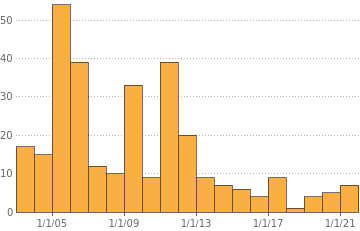

In [ ]:
DateHistogram[ironDatesList,"Year", PlotTheme->"Business"]